### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8 (same as above)
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# running this code to view entire dataframe at once without hidden rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
df_v01 = pd.read_csv('./data/coupons.csv')

### **what we are doing next (1): ...**

### <span style="color:#1A9DE6">_the following few lines of code will be used to simply review and understnd the dataframe's layout_</span>


In [4]:
df_v01.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
df_v01.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0


In [6]:
df_v01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
df_v01.shape

(12684, 26)

In [8]:
df_v01.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_v01.sample()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
5496,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,41,Single,1,Some college - no degree,Business & Financial,$12500 - $24999,NaN,never,less1,less1,less1,never,1,1,1,0,1,1


### **what we are doing next (2): ...**

### <span style="color:#1A9DE6">_starting investigation for missing values or problematic data_</span>


In [10]:
df_v01.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [11]:
df_v01.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

### **what we are doing next (3): ... making a decision about missing data**

### <span style="color:#1A9DE6">_as we can see almost the entire 'car' column has missing values (12,576 out of 12,684) ... it seems that it makes sense to drop the 'car' column entirely, since it is out of scope of our task which is to determine the driver’s behavior when it comes to accepting or not accepting the coupon_</span>

In [12]:
# dropping the 'car' column inplace to preserve the original df_v01 dataframe

df_v01.drop(columns=['car'], inplace=True)

# also cleaning up 'age' column which will become handy when solving bar coupon related questions
df_v01['age'] = df_v01['age'].replace('50plus', '50')
df_v01['age'] = df_v01['age'].replace('below21', '20')
df_v01['age'] = df_v01['age'].astype(int)

In [13]:
# checking if the 'car' column is gone; yep, now our df_v01 dataframe has 25 columns with 'car' column being gone

df_v01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int32 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

### **what we are doing next (4): ... it is getting interesting since now we are really asking ourselfves a fundumental question "What proportion of the total observations chose to accept the coupon?"**

### <span style="color:#1A9DE6">_to solve this we will use value_counts() method :-)_</span>

### **here comes our first observation: overall in 57% of driving scenarios user will use a coupon 'right away' of 'later before the coupon expires' and on the flip side of the coin in 43% of driving scenarios users will decline the coupon**


In [14]:
# this code will let us know how many 'yes' and 'no' we have overall
value_counts = df_v01['Y'].value_counts()
print(value_counts)

# now we will find the actual proportions simply deviding each value count by the total number of Y/N answers 
proportions = value_counts / len(df_v01)
print(proportions)

Y
1    7210
0    5474
Name: count, dtype: int64
Y
1    0.568433
0    0.431567
Name: count, dtype: float64


### **what we are doing next (5): ... building a bar plot to visualize the `coupon` column**

### <span style="color:#1A9DE6">_we will use Seaborn data visualization library built on top of Matplotlib_</span>

In [15]:
# to visualize the 'coupon' column, let's firs create a list of all possible values in this column 
df_v01.coupon.unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [16]:
# now, let's find the actual counts of each coupon type
df_v01['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [17]:
coupon_type = ['Coffee House', 'Restaurant(<20)', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)']

Text(0.5, 1.0, 'Figure 1: Breakdown of coupons by category')

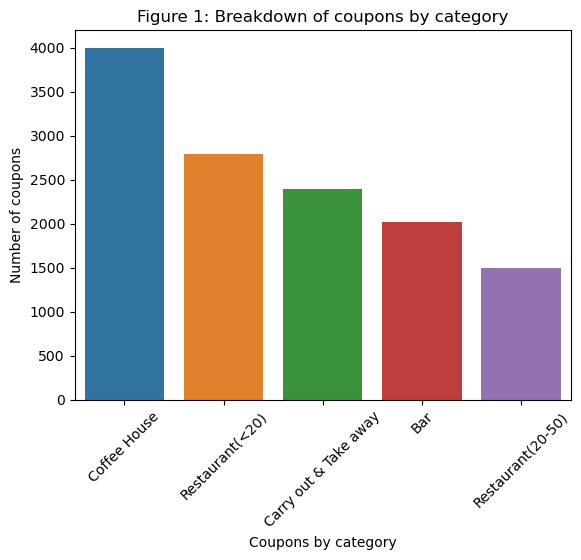

In [18]:
# now, let's plot it using Seaborn
sns.barplot(df_v01, x = coupon_type, y = df_v01['coupon'].value_counts())
plt.xlabel('Coupons by category')
plt.xticks(rotation=45)
plt.ylabel('Number of coupons')
plt.title('Figure 1: Breakdown of coupons by category')

### **what we are doing next (6): ... building a histogram to visualize the `temperature` column**

### <span style="color:#1A9DE6">_we will use Seaborn data visualization library built on top of Matplotlib_</span>


In [19]:
# running this code to make sure that the histogram's visual presentation will make sense

df_v01.temperature.unique()
# or we can use
# df_v01['temperature'].unique()

array([55, 80, 30], dtype=int64)

In [20]:
# running this code to make sure that the histogram's visual presentation will make sense

df_v01.temperature.value_counts()
# or we can use
# df_v01['temperature'].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

Text(0.5, 1.0, 'Figure 2: Temperature at the time of coupon solicitation')

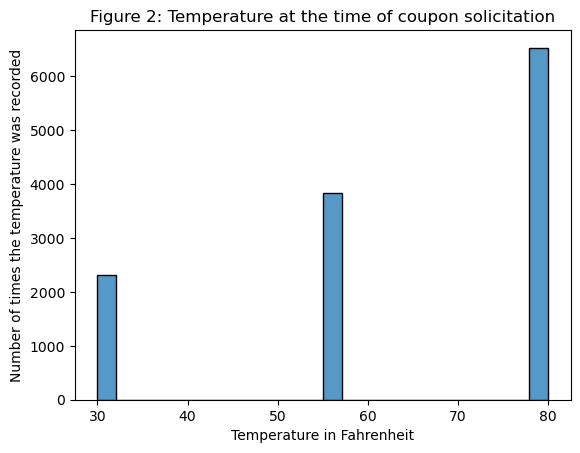

In [21]:
# buildig the histogram

sns.histplot(df_v01['temperature'])
plt.xlabel('Temperature in Fahrenheit')
plt.ylabel('Number of times the temperature was recorded')
plt.title('Figure 2: Temperature at the time of coupon solicitation')

# df_v01.temperature.plot(kind = 'hist')

### **what we are doing next: ... exploring just the bar related coupons**

### <span style="color:#1A9DE6">_1. creating a new `DataFrame` df_v02 that contains just the bar coupons_</span>

In [22]:
df_v02 = df_v01[df_v01['coupon'] == 'Bar']
# or we can use
# df_v02 = df_v01.loc[df_v01['coupon'] == 'Bar']

In [23]:
df_v02.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   int32 
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   1996 non-null   object
 15  CoffeeHouse           1978 non-null   obje

In [24]:
# visually confirming that our dataframe contains only the bar coupons
df_v02.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
3901,Home,Alone,Sunny,55,6PM,Bar,1d,Male,50,Single,0,Bachelors degree,Computer & Mathematical,$75000 - $87499,1~3,never,1~3,4~8,1~3,1,0,0,1,0,1
4734,Home,Alone,Sunny,80,10PM,Bar,1d,Male,20,Single,0,Some college - no degree,Student,$87500 - $99999,never,4~8,NaN,4~8,less1,1,1,0,1,0,1
10026,Work,Alone,Sunny,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Community & Social Services,$25000 - $37499,4~8,4~8,1~3,4~8,1~3,1,1,0,1,0,1


In [25]:
df_v02.shape

(2017, 25)

### <span style="color:#1A9DE6">_2. figuring out what proportion of bar coupons were accepted_</span>

### **our observation here is that 59% of the drivers will decline the bar coupon and 41% of the drivers will accept it ... it is nice to know that there are more responsible drivers who potentially choose not to drink vs. the ones that will ... still 41% of drivers accepting the coupon seems alarming**


In [26]:
# this code will let us know how many drivers accepted/declined bar coupons
value_counts = df_v02['Y'].value_counts()
print(value_counts)

# now we will find the actual proportions simply deviding each value count by the total number of Y/N answers 
proportions = value_counts / len(df_v02)
print(proportions)

Y
0    1190
1     827
Name: count, dtype: int64
Y
0    0.589985
1    0.410015
Name: count, dtype: float64


### <span style="color:#1A9DE6">_3. comparing the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more_</span>

### **our observation is that, overall, the drivers who went to a bar 3 or fewer times a month (_including less than one_) have smaller acceptance rate of 53% as compared to those with 4 or more bar visits whose acceptance of the bar coupon is 77%**

In [27]:
# what are the possible values in 'Bar' column? 
df_v02.Bar.unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [28]:
# the first thing we are doing here is identifying all rows that match 'less1'and '1~3' value and answered 'yes' to a bar coupon
bar_3orless_yes = df_v02.loc[((df_v02['Bar'] == 'less1') | (df_v02['Bar'] == '1~3')) & (df_v02['Y'] == 1)].shape[0]
print('number of driver accepting the bar coupon is ' + str(bar_3orless_yes))

# we are now moving to identifying all rows that match 'less1'and '1~3' value and answered 'no' to a bar coupon
bar_3orless_no = df_v02.loc[((df_v02['Bar'] == 'less1') | (df_v02['Bar'] == '1~3')) & (df_v02['Y'] == 0)].shape[0]
print('number of driver declining the bar coupon is ' + str(bar_3orless_no))

# finding the total number of answers
bar_3orless_total = bar_3orless_yes + bar_3orless_no
print('total number of drivers in `3 or less` category ' + str(bar_3orless_total))

print('proportion of drivers accepting is ' + str("{:.4f}".format(bar_3orless_yes/bar_3orless_total)))
print('proportion of drivers declining is ' + str("{:.4f}".format(bar_3orless_no/bar_3orless_total)))

number of driver accepting the bar coupon is 510
number of driver declining the bar coupon is 457
total number of drivers in `3 or less` category 967
proportion of drivers accepting is 0.5274
proportion of drivers declining is 0.4726


In [29]:
# the first thing we are doing here is identifying all rows that match '4~8' and 'gt8' value and answered 'yes' to a bar coupon
bar_4ormore_yes = df_v02.loc[((df_v02['Bar'] == '4~8') | (df_v02['Bar'] == 'gt8')) & (df_v02['Y'] == 1)].shape[0]
print('number of driver accepting the bar coupon is ' + str(bar_4ormore_yes))

# we are now moving to identifying all rows that match '4~8' and 'gt8' value and answered 'no' to a bar coupon
bar_4ormore_no = df_v02.loc[((df_v02['Bar'] == '4~8') | (df_v02['Bar'] == 'gt8')) & (df_v02['Y'] == 0)].shape[0]
print('number of driver declining the bar coupon is ' + str(bar_4ormore_no))

# finding the total number of answers
bar_4ormore_total = bar_4ormore_yes + bar_4ormore_no
print('total number of drivers in `4 or more` category ' + str(bar_4ormore_total))

print('proportion of drivers accepting is ' + str("{:.4f}".format(bar_4ormore_yes/bar_4ormore_total)))
print('proportion of drivers declining is ' + str("{:.4f}".format(bar_4ormore_no/bar_4ormore_total)))

number of driver accepting the bar coupon is 153
number of driver declining the bar coupon is 46
total number of drivers in `4 or more` category 199
proportion of drivers accepting is 0.7688
proportion of drivers declining is 0.2312


### <span style="color:#1A9DE6">_4. comparing the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to all others_</span>

### **our observation is that drivers in this category have acceptance rate of 70% which make sense taking into account the vastness of the group (_25 + is a far larger subset of users than 21-25 age group_)**

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [30]:
# here our data cleaning of 'age' column perfomed earlier is paying off ... we have nice age integer values
df_v02.age.unique()

array([21, 46, 26, 31, 41, 50, 36, 20])

In [31]:
df_v02.Bar.unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [32]:
df_v02.sample()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2656,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,26,Married partner,1,Bachelors degree,Architecture & Engineering,$37500 - $49999,never,1~3,1~3,1~3,less1,1,1,0,0,1,1


In [33]:
# creating a placeholder for bar visits to make code more efficient by using .isin() method
bar_visits = ['1~3', '4~8', 'gt8']

# filtering for 'drivers who go to a bar more than once a month' and 'over the age of 25' and accepted the bar coupon
bar_over25_yes = df_v02.loc[(df_v02['Bar'].isin(bar_visits)) & (df_v02['age'] > 25) & (df_v02['Y'] == 1)].shape[0]
print('number of drivers who are over 25 and went to a bar more than once a month and accepted the bar coupon is ' + str(bar_over25_yes))

# filtering for 'drivers who go to a bar more than once a month' and 'over the age of 25' and declined the bar coupon
bar_over25_no = df_v02.loc[(df_v02['Bar'].isin(bar_visits)) & (df_v02['age'] > 25) & (df_v02['Y'] == 0)].shape[0]
print('number of drivers who are over 25 and went to a bar more than once a month and declined the bar coupon is ' + str(bar_over25_no))

# finding the total number of answers
bar_over25_total = bar_over25_yes + bar_over25_no
print('total number of drivers over 25 with more than once in a month bar visits ' + str(bar_over25_total))

print('proportion of drivers accepting is ' + str("{:.4f}".format(bar_over25_yes/bar_over25_total)))
print('proportion of drivers declining is ' + str("{:.4f}".format(bar_over25_no/bar_over25_total)))


# was attempting to use different approach by using groupby() method ... ignore for now
# df_v02.groupby([(df_v02['Bar'] == '1~3'), (df_v02['age'] > 25)])


number of drivers who are over 25 and went to a bar more than once a month and accepted the bar coupon is 292
number of drivers who are over 25 and went to a bar more than once a month and declined the bar coupon is 128
total number of drivers over 25 with more than once in a month bar visits 420
proportion of drivers accepting is 0.6952
proportion of drivers declining is 0.3048


### <span style="color:#1A9DE6">_5. identifying the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry_</span>

 ### **our observation is that drivers in question 5 category have acceptance rate of 71%**


In [34]:
df_v02.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
10752,Work,Alone,Rainy,55,7AM,Bar,1d,Female,41,Married partner,1,Graduate degree (Masters or Doctorate),Food Preparation & Serving Related,$100000 or More,less1,gt8,4~8,4~8,4~8,1,1,1,0,1,0
10688,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Male,26,Married partner,1,Bachelors degree,Management,$12500 - $24999,1~3,4~8,1~3,1~3,NaN,1,0,0,0,1,1
12046,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,46,Married partner,1,Bachelors degree,Community & Social Services,$100000 or More,less1,never,1~3,1~3,1~3,1,1,0,0,1,1


In [35]:
df_v02.Bar.unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [36]:
df_v02.passanger.unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [37]:
df_v02.occupation.unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [38]:
# using the same methods as in question 4 above adjusting for new filtering creteria
# please note that variable 'bar_visits' was created in question 4 above

question5_yes = df_v02.loc[(df_v02['Bar'].isin(bar_visits)) & (df_v02['passanger'] != 'Kid(s)') & (df_v02['occupation'] != 'Farming Fishing & Forestry') & (df_v02['Y'] == 1)].shape[0]
print('number of drivers with question 5 criteria accepting the coupon is ' + str(question5_yes))

question5_no = df_v02.loc[(df_v02['Bar'].isin(bar_visits)) & (df_v02['passanger'] != 'Kid(s)') & (df_v02['occupation'] != 'Farming Fishing & Forestry') & (df_v02['Y'] == 0)].shape[0]
print('number of drivers with question 5 criteria declining the coupon is ' + str(question5_no))

question5_total = question5_yes + question5_no
print('total number of drivers with question 5 criteria ' + str(question5_total))

print('proportion of drivers with question 5 criteria accepting the coupon is ' + str("{:.4f}".format(question5_yes/question5_total)))
print('proportion of drivers with queston 5 creteria declining the coupon is ' + str("{:.4f}".format(question5_no/question5_total)))

number of drivers with question 5 criteria accepting the coupon is 393
number of drivers with question 5 criteria declining the coupon is 158
total number of drivers with question 5 criteria 551
proportion of drivers with question 5 criteria accepting the coupon is 0.7132
proportion of drivers with queston 5 creteria declining the coupon is 0.2868


In [39]:
# trying out .groupby() method ... disregard for now :-)
#len(df_v02['Bar'])
#df_v02.groupby(df_v02['Bar']
#df_v02.groupby('Bar').agg(sum)[['Y']]
#a = pd.DataFrame(df_v02.groupby('Bar').agg(sum)['Y'])

### <span style="color:#1A9DE6">_6. identifying the acceptance rate between those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed_</span>

 ### **our observation is that drivers in question 6 category have the same acceptance rate of 71% as in conditions for question 5 which means that being in occupations other than farming, fishing, or forestry and being not widowed had no bearing on bar coupon's acceptance/decline rate**


6. initial choice of conditions:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [40]:
# running this code to have the data handy which avoids scolling up and down within this notebook :-)
df_v02.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
5500,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Male,21,Unmarried partner,0,Some college - no degree,Education&Training&Library,$25000 - $37499,4~8,less1,1~3,less1,never,1,0,0,0,1,1
11100,Work,Alone,Snowy,30,7AM,Bar,1d,Male,50,Divorced,1,Some college - no degree,Production Occupations,$37500 - $49999,1~3,4~8,4~8,gt8,4~8,1,1,1,0,1,1
6842,Work,Alone,Rainy,55,7AM,Bar,1d,Male,26,Married partner,1,Bachelors degree,Management,$50000 - $62499,never,less1,less1,1~3,less1,1,0,0,0,1,0


In [41]:
# running this code to have the data handy which avoids scolling up and down within this notebook :-)
df_v02.Bar.unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [42]:
# running this code to have the data handy which avoids scolling up and down within this notebook :-)
df_v02.passanger.unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [43]:
# running this code to have the data handy which avoids scolling up and down within this notebook :-)
df_v02.maritalStatus.unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [261]:
# using the same methods as in question 4 and 5 above adjusting for "go to bars more than once a month, had passengers that were not a kid, and were not widowed"

question6_yes = df_v02.loc[(df_v02['Bar'].isin(bar_visits)) & (df_v02['passanger'] != 'Kid(s)') & (df_v02['maritalStatus'] != 'Widowed') & (df_v02['Y'] == 1)].shape[0]
print('number of drivers with question 6 criteria accepting the coupon is ' + str(question6_yes))

question6_no = df_v02.loc[(df_v02['Bar'].isin(bar_visits)) & (df_v02['passanger'] != 'Kid(s)') & (df_v02['maritalStatus'] != 'Widowed') & (df_v02['Y'] == 0)].shape[0]
print('number of drivers with question 6 criteria declining the coupon is ' + str(question6_no))

question6_total = question6_yes + question6_no
print('total number of drivers with question 6 criteria ' + str(question6_total))

print('proportion of drivers with question 6 criteria accepting the coupon is ' + str("{:.4f}".format(question6_yes/question6_total)))
print('proportion of drivers with queston 6 creteria declining the coupon is ' + str("{:.4f}".format(question6_no/question6_total)))

number of drivers with question 6 criteria accepting the coupon is 393
number of drivers with question 6 criteria declining the coupon is 158
total number of drivers with question 6 criteria 551
proportion of drivers with question 6 criteria accepting the coupon is 0.7132
proportion of drivers with queston 6 creteria declining the coupon is 0.2868


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**observations so far when it comes to drivers who accepted the bar coupon: ...**

* despite the fact that entire population of drivers tend to decline the bar coupon, there are certain drivers that do
* and those drivers are typically already gone to a bar in past with increasing rate of acceptance as the number of past bar visits increases
* also, it appeared that being in occupations other than farming, fishing, or forestry or being not widowed had no bearing on bar coupon's acceptance/decline rate

### <span style="color:#1A9DE6">in this section we will dive into independent investigation</span>

_using the bar coupon example as motivation, we will explore 'Restaurant(20-50)' coupon group and will determine the characteristics of passengers who accept/decline the coupons_  

In [44]:
# first things first, creating a new dataframe that will contain only 'Restaurant(20-50)' coupons
df_v03 = df_v01[df_v01['coupon'] == 'Restaurant(20-50)']

<span style="color:#1A9DE6">_next several lines of code will analyze and diagnose the new dataframe_</span>

In [46]:
df_v03.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,1,0,0,1,0


In [47]:
df_v03.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12657,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,31,Married partner,1,Bachelors degree,Business & Financial,$100000 or More,less1,never,4~8,gt8,less1,1,0,0,1,0,0
12661,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,31,Married partner,1,Bachelors degree,Business & Financial,$100000 or More,less1,never,4~8,gt8,less1,1,0,0,1,0,0
12669,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1,0,0


In [49]:
# 1492 rows ... this corresponds precisely with the initial dataframe's unique values in 'coupon'
df_v03.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1492 entries, 14 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1492 non-null   object
 1   passanger             1492 non-null   object
 2   weather               1492 non-null   object
 3   temperature           1492 non-null   int64 
 4   time                  1492 non-null   object
 5   coupon                1492 non-null   object
 6   expiration            1492 non-null   object
 7   gender                1492 non-null   object
 8   age                   1492 non-null   int32 
 9   maritalStatus         1492 non-null   object
 10  has_children          1492 non-null   int64 
 11  education             1492 non-null   object
 12  occupation            1492 non-null   object
 13  income                1492 non-null   object
 14  Bar                   1482 non-null   object
 15  CoffeeHouse           1465 non-null   obj

In [51]:
df_v03.shape

(1492, 25)

In [52]:
df_v03.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2600,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,50,Single,0,Some college - no degree,Office & Administrative Support,$12500 - $24999,1~3,1~3,less1,1~3,less1,1,1,0,0,1,1
8691,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,26,Single,0,Bachelors degree,Business & Financial,$100000 or More,4~8,1~3,less1,1~3,less1,1,1,1,0,1,0
1114,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,41,Married partner,1,Associates degree,Unemployed,$75000 - $87499,never,less1,4~8,1~3,less1,1,1,0,0,1,0


<span style="color:#1A9DE6">_let's answer first fundamental question: how many drivers accepted the 'Restaurant(20-50)' coupon to begin with?_</span>

<span style="color:#0049DA">_our first observation is that 56% of drivers declined the 'Restaurant(20-50)' coupon with only remaining 44% accepted it_</span>

In [53]:
# this code will let us know how many 'yes' and 'no' we have overall
value_counts = df_v03['Y'].value_counts()
print(value_counts)

# now we will find the actual proportions simply deviding each value count by the total number of Y/N answers 
proportions = value_counts / len(df_v03)
print(proportions)

Y
0    834
1    658
Name: count, dtype: int64
Y
0    0.558981
1    0.441019
Name: count, dtype: float64


In [61]:
df_v03.occupation.value_counts()

occupation
Unemployed                                   233
Student                                      176
Computer & Mathematical                      169
Sales & Related                              120
Education&Training&Library                   106
Management                                    88
Business & Financial                          78
Office & Administrative Support               78
Arts Design Entertainment Sports & Media      69
Retired                                       55
Food Preparation & Serving Related            35
Healthcare Practitioners & Technical          33
Healthcare Support                            32
Legal                                         26
Community & Social Services                   26
Transportation & Material Moving              23
Personal Care & Service                       22
Construction & Extraction                     21
Protective Service                            21
Installation Maintenance & Repair             20
Life Phys

In [71]:
# now let's see if visualization of acceptance of coupons for each age group will tell us something ... using plotly
fig = px.scatter(df_v03.groupby('age').agg(sum)[['Y']], x = 'Y', size = 'Y')
fig.update_xaxes(title_text = 'Number of accepted \'Restaurant(20-50)\' category coupons')
fig.update_yaxes(title_text = 'Driver\'s age')
fig.update_layout(title="Figure 3: Acceptance of coupons by age group")
fig.show()

<span style="color:#0049DA">_our next observations are: 1) drivers in their mid-20s tend to accept the 'Restaurant(20-50)' coupon the most and 2) we see inverted correlation between age and acceptance of the coupons telling us that as the age increases the acceptance of the coupons declines_</span>

<span style="color:#1A9DE6">_let's answer one more question: what is the acceptance rate of 'Restaurant(20-50)' coupons between female and male drivers?_</span>

In [76]:
# identifying the acceptance rate among female drivers

female_yes = df_v03.loc[(df_v03['gender'] == 'Female') & (df_v03['Y'] == 1)].shape[0]
print('number of female drivers accepting the coupon is ' + str(female_yes))

female_no = df_v03.loc[(df_v03['gender'] == 'Female') & (df_v03['Y'] == 0)].shape[0]
print('number of female drivers declining the coupon is ' + str(female_no))

female_total = female_yes + female_no
print('total number of female drivers ' + str(female_total))

print('proportion of female drivers accepting the coupon is ' + str("{:.4f}".format(female_yes/female_total)))
print('proportion of female drivers declining the coupon is ' + str("{:.4f}".format(female_no/female_total)))

number of female drivers accepting the coupon is 322
number of female drivers declining the coupon is 432
total number of female drivers 754
proportion of female drivers accepting the coupon is 0.4271
proportion of female drivers declining the coupon is 0.5729


In [77]:
# now let's identifying the acceptance rate among male drivers

male_yes = df_v03.loc[(df_v03['gender'] == 'Male') & (df_v03['Y'] == 1)].shape[0]
print('number of male drivers accepting the coupon is ' + str(male_yes))

male_no = df_v03.loc[(df_v03['gender'] == 'Male') & (df_v03['Y'] == 0)].shape[0]
print('number of Male drivers declining the coupon is ' + str(male_no))

male_total = male_yes + male_no
print('total number of male drivers ' + str(male_total))

print('proportion of male drivers accepting the coupon is ' + str("{:.4f}".format(male_yes/male_total)))
print('proportion of male drivers declining the coupon is ' + str("{:.4f}".format(male_no/male_total)))

number of male drivers accepting the coupon is 336
number of Male drivers declining the coupon is 402
total number of male drivers 738
proportion of male drivers accepting the coupon is 0.4553
proportion of male drivers declining the coupon is 0.5447


<span style="color:#0049DA">_and our final observation is that the coupon acceptance rate for female drivers of 43% is very close to coupon acceptance rate for male drivers of 46% which basically tells us that female and male drivers in their majority tend to equally decline 'Restaurant(20-50)' coupons_</span>